In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_frame = pd.read_csv("/content/drive/MyDrive/DataSet_ML/gkuc,c,h.csv")

In [4]:
data_frame.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
data_frame.shape

(10000, 18)

In [6]:
data_frame.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [7]:
data_frame.duplicated().sum()

0

In [8]:
data_frame.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [9]:
data_frame

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [10]:
data_frame['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
data_frame['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
data_frame['Card Type'].value_counts()

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

In [13]:
data_frame = pd.get_dummies(data_frame, columns=['Gender', 'Geography', 'Card Type'], prefix=['Gender_', 'Geography_', 'Card Type_'])
data_frame.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Gender__Female,Gender__Male,Geography__France,Geography__Germany,Geography__Spain,Card Type__DIAMOND,Card Type__GOLD,Card Type__PLATINUM,Card Type__SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,True,False,True,False,False,True,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,True,False,False,False,True,True,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,True,False,True,False,False,True,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,True,False,True,False,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,True,False,False,False,True,False,True,False,False


In [14]:
X = data_frame.drop(columns=['Exited'])
y = data_frame['Exited']

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (8000, 20)
Shape of X_test: (2000, 20)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


In [16]:
scaler = MinMaxScaler()
X_train_std = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(scaler.fit_transform(X_test), columns=X_train.columns)
X_train_std

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Gender__Female,Gender__Male,Geography__France,Geography__Germany,Geography__Spain,Card Type__DIAMOND,Card Type__GOLD,Card Type__PLATINUM,Card Type__SILVER
0,0.672,0.189189,0.6,0.000000,0.333333,1.0,1.0,0.895550,0.0,0.25,0.414576,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.564,0.324324,0.4,0.476786,0.333333,1.0,1.0,0.980029,0.0,0.75,0.951016,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.418,0.081081,0.3,0.457317,0.000000,1.0,0.0,0.429261,1.0,0.75,0.195938,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.422,0.121622,0.9,0.540606,0.000000,1.0,0.0,0.765408,1.0,0.25,0.482676,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.334,0.513514,0.9,0.566554,0.000000,0.0,0.0,0.197107,1.0,0.50,0.673835,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.836,0.486486,0.8,0.277853,0.000000,1.0,1.0,0.346662,0.0,0.50,0.485066,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7996,0.664,0.540541,0.1,0.000000,0.000000,1.0,1.0,0.003084,0.0,0.75,0.652330,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7997,0.770,0.270270,0.1,0.000000,0.666667,0.0,0.0,0.460925,1.0,1.00,0.615293,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7998,0.634,0.337838,0.8,0.758186,0.000000,1.0,0.0,0.487381,1.0,0.50,0.617682,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(5, input_dim=20, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 105       
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 127 (508.00 Byte)
Trainable params: 127 (508.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
# Fit the model
history = model.fit(X_train_std, y_train, epochs=15, batch_size=100, validation_split=0.2)

Epoch 1/15
64/64 [==============================] - 1s 5ms/step - loss: 0.6204 - accuracy: 0.7923 - val_loss: 0.5651 - val_accuracy: 0.8069
Epoch 2/15
64/64 [==============================] - 0s 2ms/step - loss: 0.5184 - accuracy: 0.8041 - val_loss: 0.4615 - val_accuracy: 0.8031
Epoch 3/15
64/64 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8169 - val_loss: 0.3576 - val_accuracy: 0.8444
Epoch 4/15
64/64 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.8736 - val_loss: 0.2687 - val_accuracy: 0.9131
Epoch 5/15
64/64 [==============================] - 0s 2ms/step - loss: 0.2341 - accuracy: 0.9458 - val_loss: 0.1919 - val_accuracy: 0.9725
Epoch 6/15
64/64 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9825 - val_loss: 0.1215 - val_accuracy: 0.9919
Epoch 7/15
64/64 [==============================] - 0s 3ms/step - loss: 0.0968 - accuracy: 0.9964 - val_loss: 0.0719 - val_accuracy: 0.9987
Epoch 8/15
64/64 [==

In [21]:
predictions = model.predict(X_test_std)
predicted_classes = np.where(predictions > 0.5, 1, 0)

63/63 [==============================] - 0s 1ms/step


In [22]:
predicted_classes

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [23]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, predicted_classes)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.999


In [24]:
history.history

{'loss': [0.6203797459602356,
  0.5183736681938171,
  0.41535910964012146,
  0.31850653886795044,
  0.23412829637527466,
  0.16076306998729706,
  0.09675168246030807,
  0.06005321070551872,
  0.04109260439872742,
  0.030352599918842316,
  0.023962147533893585,
  0.019844895228743553,
  0.01710406504571438,
  0.015239173546433449,
  0.013881726190447807],
 'accuracy': [0.7923437356948853,
  0.8040624856948853,
  0.8168749809265137,
  0.8735937476158142,
  0.9457812309265137,
  0.9825000166893005,
  0.9964062571525574,
  0.9984375238418579,
  0.9984375238418579,
  0.9984375238418579,
  0.9984375238418579,
  0.9984375238418579,
  0.9984375238418579,
  0.9984375238418579,
  0.9984375238418579],
 'val_loss': [0.5650501847267151,
  0.4615382254123688,
  0.3575838506221771,
  0.2687104046344757,
  0.19189269840717316,
  0.12153534591197968,
  0.07190202921628952,
  0.047284383326768875,
  0.03381973132491112,
  0.02599138766527176,
  0.021068649366497993,
  0.017908792942762375,
  0.015812972

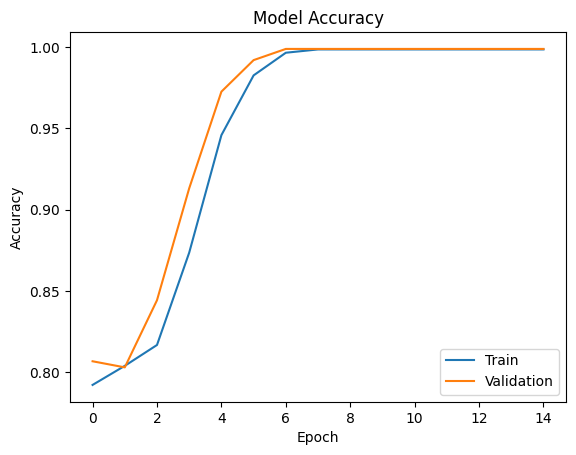

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

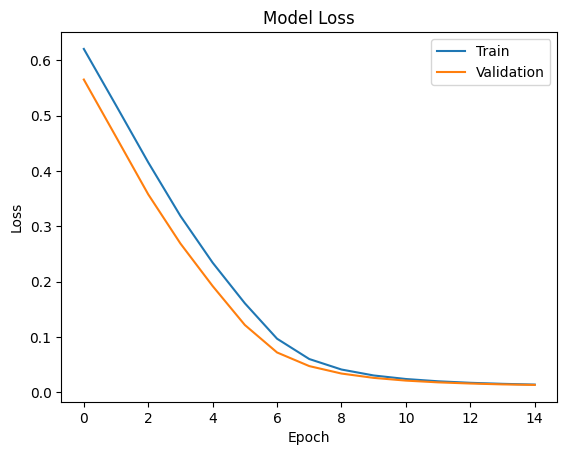

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()